In [61]:
deps <- c("ISLR", "Metrics", "ggplot2", "tidyr", "microbenchmark", "dplyr", "patchwork", "gridExtra", "readxl", "cvTools", "leaps", "assertthat", "assertr", "testthat", "caret", "leaps", "pls", "glmnet", "ROCit", "pROC", "cutpointr", "ROCR", "tidyverse", "knitr")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}

set.seed(42)
options(scipen=999)

In [62]:
df <- read.csv("data.csv")
kable(df)



|command                            |      mean|    stddev|    median|      user|    system|       min|       max|
|:----------------------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|plain: itertools.py                | 0.5674692| 0.0119883| 0.5700655| 0.5599028| 0.0074184| 0.5496380| 0.5865690|
|plain: lib.py                      | 0.1003698| 0.0026018| 0.0995592| 0.0950988| 0.0051505| 0.0976092| 0.1086287|
|plain: plain.py                    | 0.5631182| 0.0085463| 0.5607433| 0.5574100| 0.0056163| 0.5564152| 0.5863659|
|multiprocessing: imap_unordered.py | 0.2258019| 0.0085966| 0.2235880| 0.5456730| 0.1661910| 0.2184310| 0.2449692|
|multiprocessing: imap.py           | 0.2328316| 0.0065632| 0.2306093| 0.5554529| 0.1625106| 0.2235672| 0.2426373|
|multiprocessing: map_async.py      | 0.4528332| 0.0248580| 0.4485649| 1.0100400| 0.1108107| 0.4314743| 0.5167882|
|multiprocessing: map.py            | 0.4400746| 0.0043315| 0.4405771| 0.98536

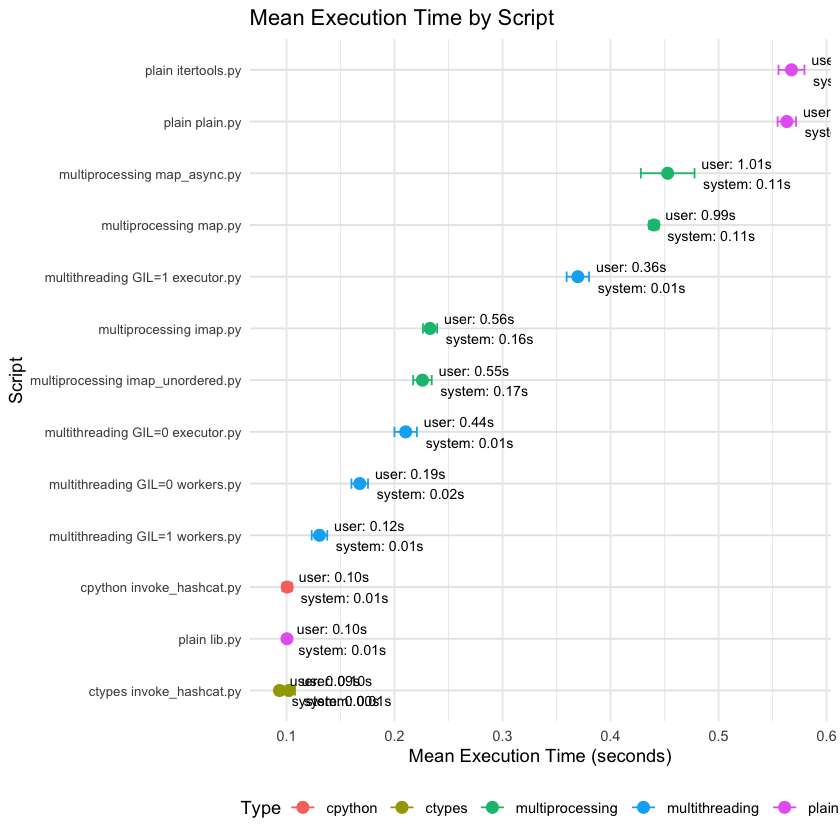

In [60]:
# First, create a helper column for labels
df$label <- sprintf("user: %.2fs\nsystem: %.2fs", df$user, df$system)

ggplot(df, aes(x = reorder(paste(type, command), mean), y = mean, color = type)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean - stddev, ymax = mean + stddev), width = 0.2) +
  geom_text(
    aes(y = mean + stddev, label = label),
    hjust = -0.1,
    size = 3,
    color = "black"
  ) +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Mean Execution Time by Script",
    x = "Script", 
    y = "Mean Execution Time (seconds)",
    color = "Type"
  ) +
  theme(
    axis.text.y = element_text(size = 8),
    panel.grid.major.y = element_line(color = "gray90"),
    panel.grid.minor.y = element_blank(),
    legend.position = "bottom"
  )